In [14]:
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import os

Dataset = 'data'
Data_Dir = os.listdir(Dataset)
print(Data_Dir)

img_rows , img_cols = 112 ,112

images = []
labels = []

for category in Data_Dir :
    folder_path = os.path.join(Dataset , category)
    for img in os.listdir(folder_path) :
        img_path = os.path.join(folder_path , img)
        img = cv2.imread(img_path)

        try :
            gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)

            resized_img = cv2.resize(gray , (img_rows,img_cols))
            images.append(resized_img)
            labels.append(category)
        except Exception as e :
            print('Exception : ' , e )


['without_mask', 'with_mask']


In [15]:

images = np.array(images)/255.0
images = np.reshape(images , (images.shape[0],img_rows,img_cols,1))

lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)
labels = np.array(labels)

(train_X , test_X , train_y , test_y ) = train_test_split(images , labels , test_size=0.25 , random_state=0)


In [16]:
from keras.models import Sequential 
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D , MaxPooling2D

num_classes = 2
batch_size = 32 

model = Sequential()

model.add(Conv2D(64 , (3,3) , input_shape=(img_rows , img_cols , 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128 , (3,3) ))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64 , activation='relu'))
model.add(Dense(num_classes , activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 110, 110, 64)      640       
_________________________________________________________________
activation_2 (Activation)    (None, 110, 110, 64)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 53, 53, 128)       73856     
_________________________________________________________________
activation_3 (Activation)    (None, 53, 53, 128)       0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 86528)            

In [17]:
from keras.utils.vis_utils import plot_model

plot_model(model , to_file='data/mask_architecture.png')


('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [18]:
from keras.optimizers import Adam

epochs = 100

model.compile(loss='categorical_crossentropy' ,
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

fitted_model = model.fit(
            train_X , 
            train_y ,
            epochs = epochs , 
            validation_split = 0.25)


Epoch 1/100
25/25 [==============================] - 7s 271ms/step - loss: 1.4009 - accuracy: 0.5577 - val_loss: 0.6847 - val_accuracy: 0.6163
Epoch 2/100
25/25 [==============================] - 7s 296ms/step - loss: 0.6735 - accuracy: 0.6003 - val_loss: 0.6541 - val_accuracy: 0.5930
Epoch 3/100
25/25 [==============================] - 7s 284ms/step - loss: 0.6312 - accuracy: 0.6206 - val_loss: 0.5070 - val_accuracy: 0.7907
Epoch 4/100
25/25 [==============================] - 7s 277ms/step - loss: 0.4607 - accuracy: 0.7966 - val_loss: 0.3774 - val_accuracy: 0.8566
Epoch 5/100
25/25 [==============================] - 7s 293ms/step - loss: 0.3557 - accuracy: 0.8609 - val_loss: 0.3960 - val_accuracy: 0.7984
Epoch 6/100
25/25 [==============================] - 8s 301ms/step - loss: 0.3459 - accuracy: 0.8329 - val_loss: 0.2755 - val_accuracy: 0.8915
Epoch 7/100
25/25 [==============================] - 8s 303ms/step - loss: 0.2435 - accuracy: 0.9192 - val_loss: 0.2292 - val_accuracy: 0.8837

Epoch 58/100
25/25 [==============================] - 8s 308ms/step - loss: 6.7634e-04 - accuracy: 1.0000 - val_loss: 0.1930 - val_accuracy: 0.9419
Epoch 59/100
25/25 [==============================] - 7s 291ms/step - loss: 1.9957e-04 - accuracy: 1.0000 - val_loss: 0.1957 - val_accuracy: 0.9496
Epoch 60/100
25/25 [==============================] - 7s 289ms/step - loss: 3.3767e-04 - accuracy: 1.0000 - val_loss: 0.1751 - val_accuracy: 0.9457
Epoch 61/100
25/25 [==============================] - 7s 287ms/step - loss: 0.0017 - accuracy: 0.9999 - val_loss: 0.2152 - val_accuracy: 0.9496
Epoch 62/100
25/25 [==============================] - 7s 281ms/step - loss: 0.0037 - accuracy: 0.9983 - val_loss: 0.1564 - val_accuracy: 0.9574
Epoch 63/100
25/25 [==============================] - 7s 284ms/step - loss: 7.3400e-04 - accuracy: 1.0000 - val_loss: 0.1578 - val_accuracy: 0.9496
Epoch 64/100
25/25 [==============================] - 8s 314ms/step - loss: 8.0788e-04 - accuracy: 1.0000 - val_loss: 0.

In [19]:
model.save('model_100.h5')

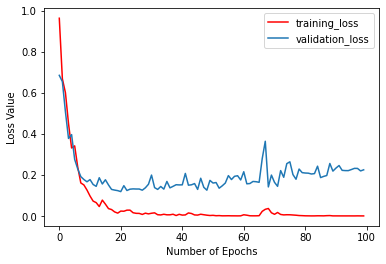

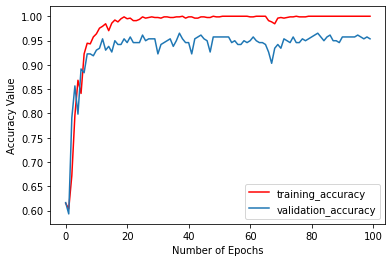

In [22]:
from matplotlib import pyplot as plt 

plt.plot(fitted_model.history['loss'] , 'r' , label="training_loss")
plt.plot(fitted_model.history['val_loss'] , label="validation_loss")
plt.xlabel('Number of Epochs')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

plt.plot(fitted_model.history['accuracy'] , 'r' , label="training_accuracy")
plt.plot(fitted_model.history['val_accuracy'] , label="validation_accuracy")
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy Value')
plt.legend()
plt.show()